In [1]:
import DoseComparison
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

/usr/local/var/pyenv/versions/miniconda2-4.1.11/envs/darcytools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def wave(x, y, z, v):
    return np.cos(v * x) + np.cos(v * y) + np.cos(v * z) \
        + 2 * (x ** 2 + y ** 2 + z ** 2)

In [3]:
x, y, z = np.mgrid[-2:2:500j, -2:2:500j, -2:2:5j]
img1 = wave(x, y, z, 10)
img2 = wave(x, y, z, 12)

In [4]:
gamma, ndd = DoseComparison.DoseComparison(img1, img2, delta_r=2, delta_d=0.1)

DoseComparison.py:57: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dist[dist > delta_r] = delta_r
/usr/local/var/pyenv/versions/miniconda2-4.1.11/envs/darcytools/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 504 but corresponding boolean dimension is 500
  dout = self.data[indx]
/usr/local/var/pyenv/versions/miniconda2-4.1.11/envs/darcytools/lib/python2.7/site-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 504 but corresponding boolean dimension is 500
  dout._mask = _mask[indx]


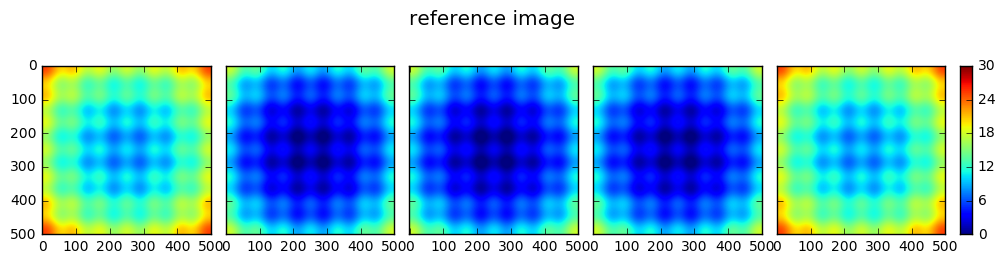

In [5]:
fig = plt.figure(figsize=(12, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(1,5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
for i, ax in enumerate(grid):
    im = ax.imshow(img1[:,:,i], vmin=0, vmax=30)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
fig.suptitle('reference image', size='x-large')

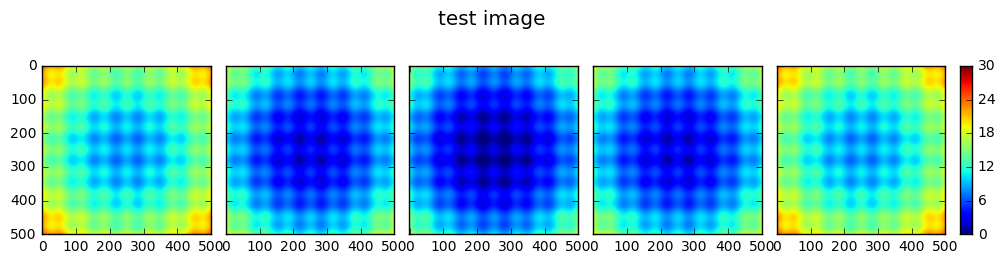

In [6]:
fig = plt.figure(figsize=(12, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(1,5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
for i, ax in enumerate(grid):
    im = ax.imshow(img2[:,:,i], vmin=0, vmax=30)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
fig.suptitle('test image', size='x-large')

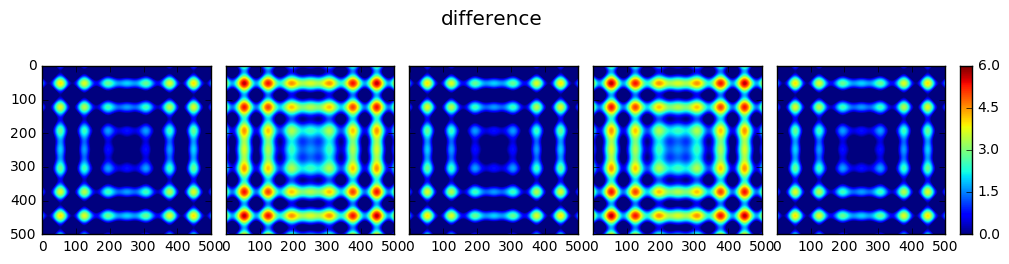

In [7]:
fig = plt.figure(figsize=(12, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(1,5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
for i, ax in enumerate(grid):
    im = ax.imshow(img2[:,:,i] - img1[:,:,i], vmin=0, vmax=6)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
fig.suptitle('difference', size='x-large')

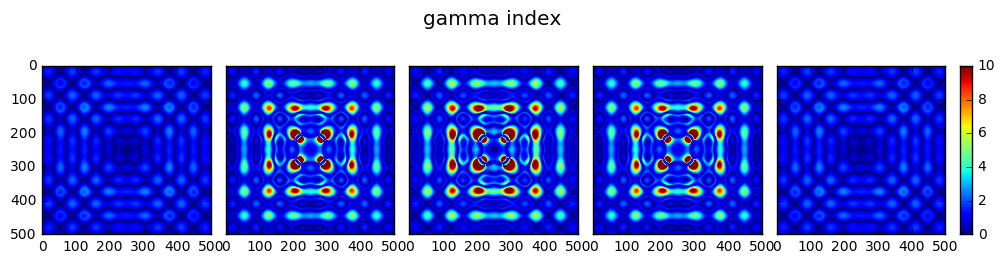

In [8]:
fig = plt.figure(figsize=(12, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(1,5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
for i, ax in enumerate(grid):
    im = ax.imshow(gamma[:,:,i], vmin=0, vmax=10)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
fig.suptitle('gamma index', size='x-large')

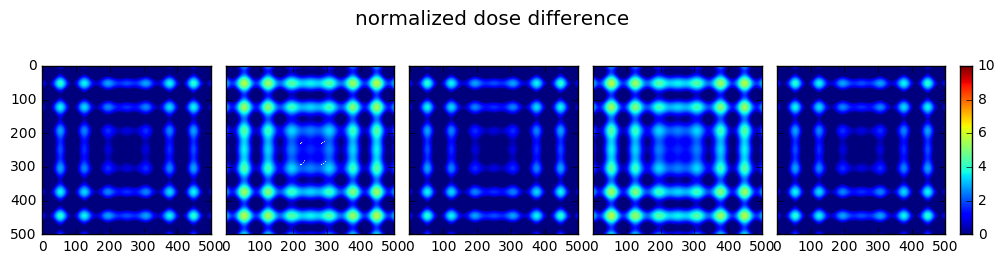

In [9]:
fig = plt.figure(figsize=(12, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(1,5), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
for i, ax in enumerate(grid):
    im = ax.imshow(ndd[:,:,i], vmin=0, vmax=10)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
fig.suptitle('normalized dose difference', size='x-large')